# Unit Root Tests - Augmented Dickey Fuller Test

In a stationary time series, statistical properties such as mean and variance are constant over time. In a non-stationary series, these properties are dependent on time. Stationarity is one of the assumptions in many modelling techniques like ARIMA-forecasting.

## Unit Root
A unit root is a stochastic trend in a time series, sometimes called a “random walk with drift”. If a time series has a unit root, it shows a systematic pattern that is unpredictable.
If we’re analyzing time series the existence of unit roots can cause our analysis to have serious issues like:
1. Spurious regressions: you could get high r-squared values even if the data is uncorrelated.
2. Errant behavior due to assumptions for analysis not being valid. For example, t-ratios will not follow a t-distribution.
Unit root tests are tests for stationarity in a time series. A time series has stationarity if a shift in time doesn’t cause a change in the shape of the distribution; unit roots are one cause for non-stationarity.


The Augmented Dickey Fuller Test is a statistical test that allows us to check if our Time-Series is stationary or not.

ADF test is a statistical significance test, there is a hypothesis testing involved with a null and alternate hypothesis and as a result a test statistic is computed and p-values get reported.
It is from the test statistic and the p-value, we can make an inference as to whether a given series is stationary or not. The ADF test belongs to a category of tests called ‘Unit Root Test’, which is the proper method for testing the stationarity of a time series. Unit root is a characteristic of a time series that makes it non-stationary.
A unit root is said to exist in a time series of the value of alpha = 1 in the below equation.
$$ Y_t = \alpha Y_{t-1} + \beta X_e + \epsilon  $$
The presence of a unit root means the time series is non-stationary. Besides, the number of unit roots contained in the series corresponds to the number of differencing operations required to make the series stationary.

A Dickey-Fuller test is a unit root test that tests the null hypothesis that $\alpha=1$ in the model equation. alpha is the coefficient of the first lag on Y.
$$ y_t = c+ \beta t + \alpha y_{t-1} + \phi \Delta Y_{t-1} + e_t $$

If the null hypothesis is not rejected it suggests presence of non-stationarity. To confirm stationarity, we need to reject the null hypothesis at a given level of significance. 

Next we try to implement the ADF Test in Python.

In [1]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
url = 'https://raw.githubusercontent.com/selva86/datasets/master/a10.csv' #This dataset counts the total monthly scripts for pharmaceutical products falling under ATC code A10. The original source of this dataset is the Australian Health Insurance Commission.
df = pd.read_csv(url, parse_dates=['date'], index_col='date')
series = df.loc[:, 'value'].values
df.plot(figsize=(14,8), legend=None, title='a10 - Drug Sales Series');
plt.show()

<Figure size 1400x800 with 1 Axes>

In [2]:
result = adfuller(series, autolag='AIC') #The autolag='AIC' finds the lag with the minimum AIC score.
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[2]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')   

ADF Statistic: 3.14518568930673
n_lags: 15
p-value: 1.0
Critial Values:
   1%, -3.465620397124192
Critial Values:
   5%, -2.8770397560752436
Critial Values:
   10%, -2.5750324547306476


The p-value is obtained is greater than significance level of 0.05 and the ADF statistic is higher than any of the critical values.

Clearly, there is no reason to reject the null hypothesis. So, the time series is in fact non-stationary.

ADF Statistic: -4.82807972657278
p-value: 4.8043812727444745e-05
Critial Values:
   1%, -3.5003788874873405
Critial Values:
   5%, -2.8921519665075235
Critial Values:
   10%, -2.5830997960069446


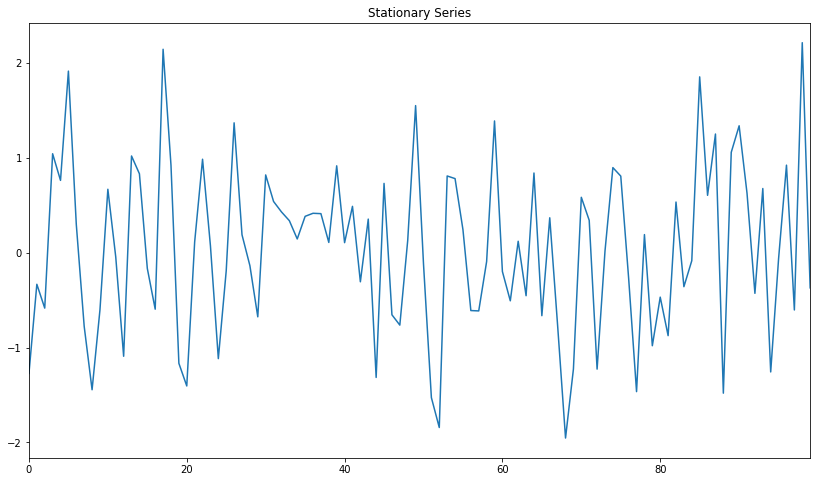

In [3]:
# ADF test on random numbers
series = np.random.randn(100)
pd.DataFrame(data=series).plot(figsize=(14,8), legend=None, title='Stationary Series')
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

The p-value is very less than the significance level of 0.05 and hence we can reject the null hypothesis and take that the series is stationary.